In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import fpgrowth
import warnings
warnings.filterwarnings('ignore')

# Book CSV

In [2]:
books = pd.read_csv("book.csv")

In [3]:
books.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


# Apriori Algorithm
### Association rules with 10% Support and 70% confidence

In [4]:
# Data preprocessing not required as it is already in transaction format
book = apriori(books, min_support=0.1, use_colnames=True)
book

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(YouthBks, ChildBks)"


In [5]:
rules = association_rules(book, metric="lift", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
...,...,...,...,...,...,...,...,...,...
95,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
96,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
97,(ArtBks),"(GeogBks, CookBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327
98,(GeogBks),"(ArtBks, CookBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800


### An leverage value of 0 indicates independence. Range will be [-1 1] 
### A high conviction value means that the consequent is highly depending on the antecedent and range [0 inf]

In [6]:
rules.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
29,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
28,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
77,"(ArtBks, ChildBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
80,(GeogBks),"(ArtBks, ChildBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448
85,(ArtBks),"(CookBks, DoItYBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
84,"(CookBks, DoItYBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797
98,(GeogBks),"(ArtBks, CookBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800
95,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
97,(ArtBks),"(GeogBks, CookBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327
96,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657


In [7]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
...,...,...,...,...,...,...,...,...,...
95,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
96,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
97,(ArtBks),"(GeogBks, CookBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327
98,(GeogBks),"(ArtBks, CookBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800


### Data Visualization

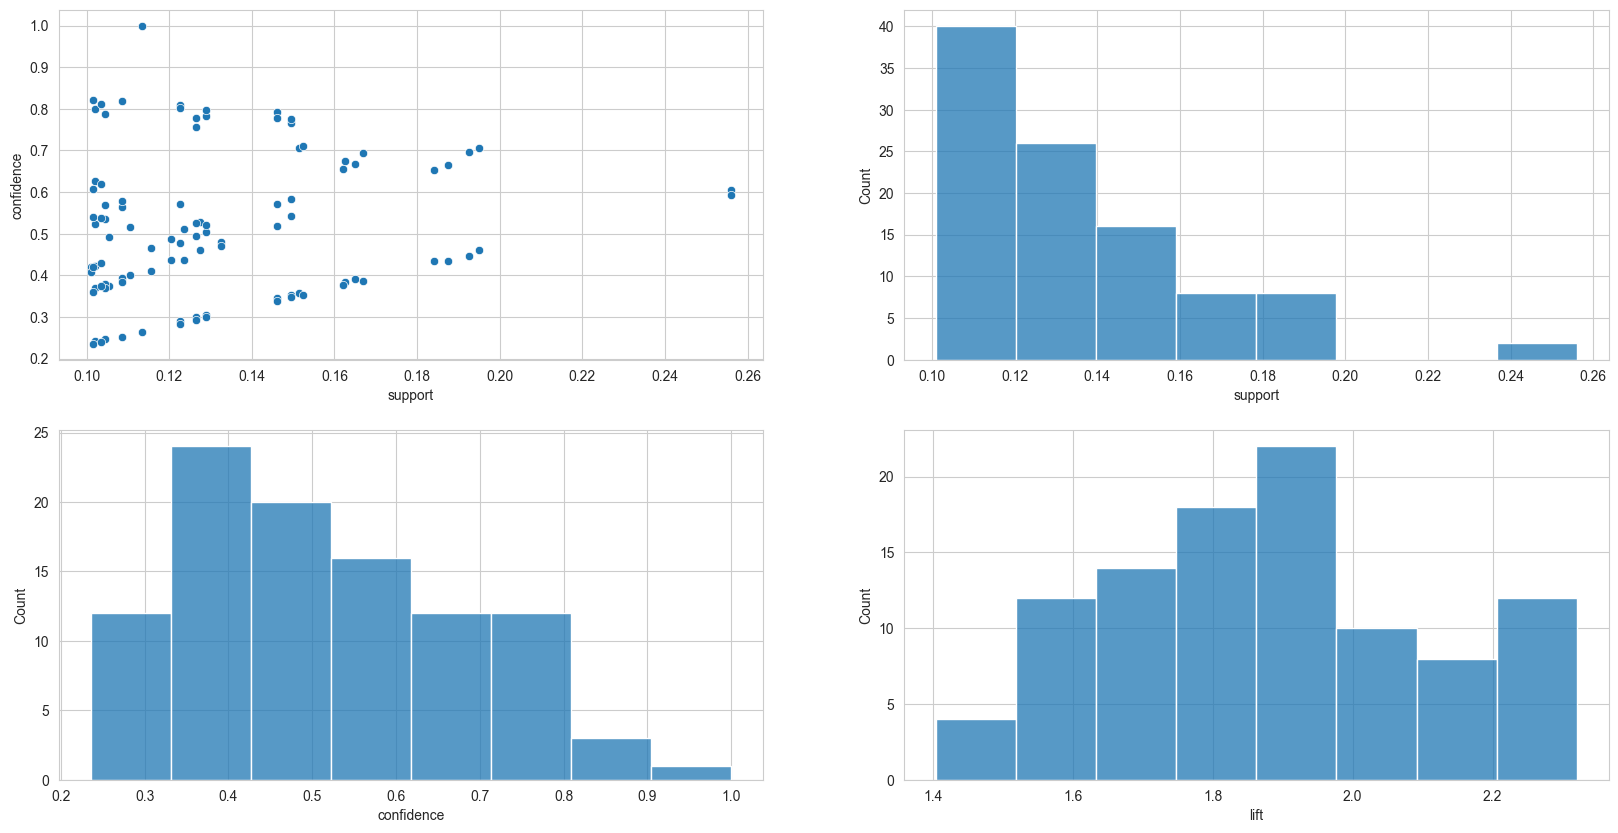

In [8]:
fig,axes = plt.subplots(2,2,figsize=(20,10))
fig1 = sns.scatterplot(data = rules,x='support',y='confidence',ax=axes[0,0])
fig2 = sns.histplot(data = rules,x='support',ax=axes[0,1])
fig3 = sns.histplot(data = rules,x='confidence',ax=axes[1,0])
fig4 = sns.histplot(data = rules,x='lift',ax=axes[1,1])
plt.show()

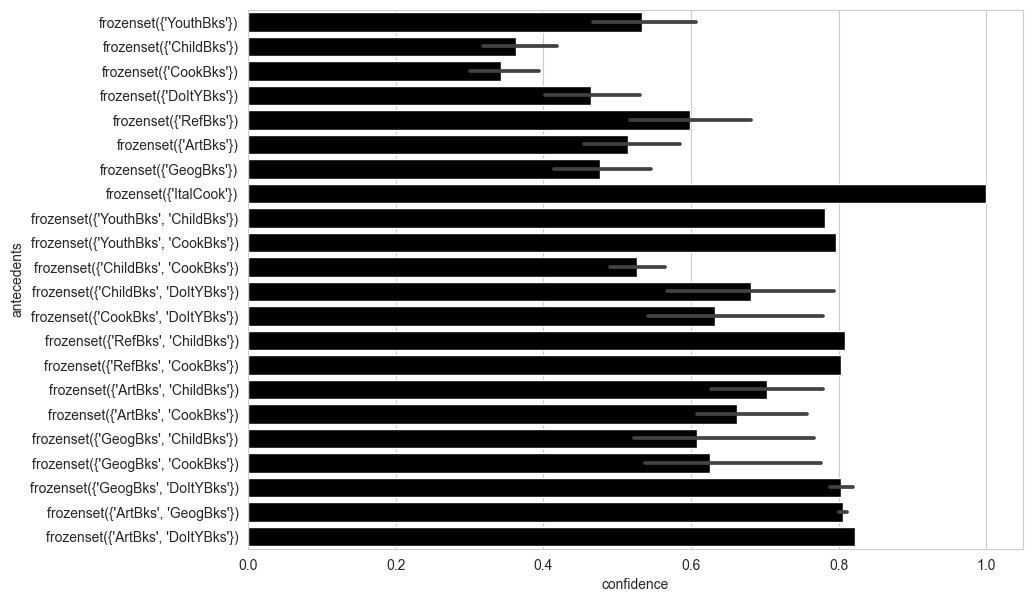

In [9]:
plt.figure(figsize=(10,7))
fig1 = sns.barplot(data = rules,x = 'confidence',y = 'antecedents',color='black')
plt.show()

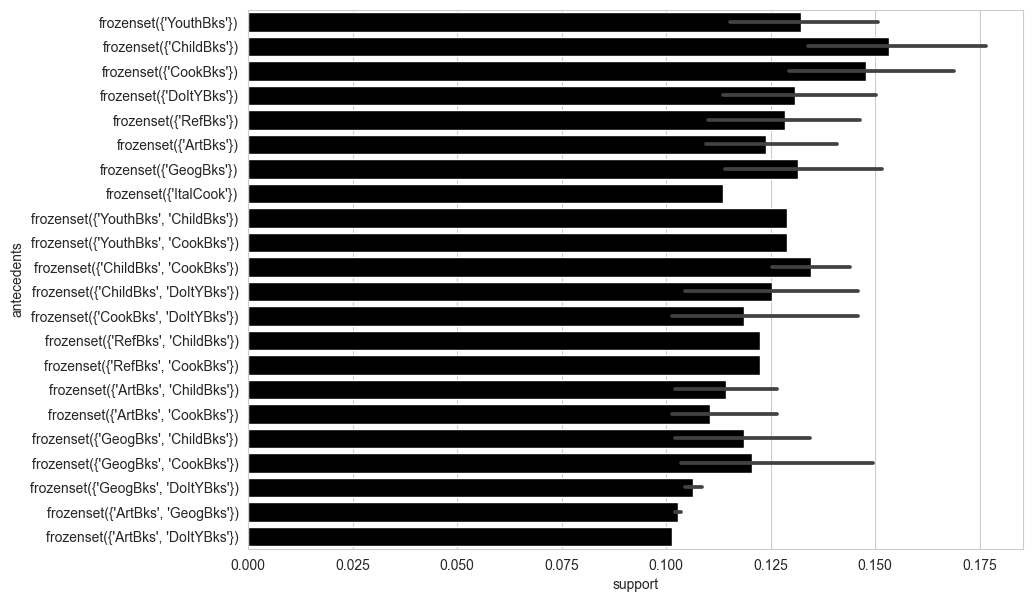

In [10]:
plt.figure(figsize=(10,7))
fig1 = sns.barplot(data = rules,x = 'support',y = 'antecedents',color='black')
plt.show()

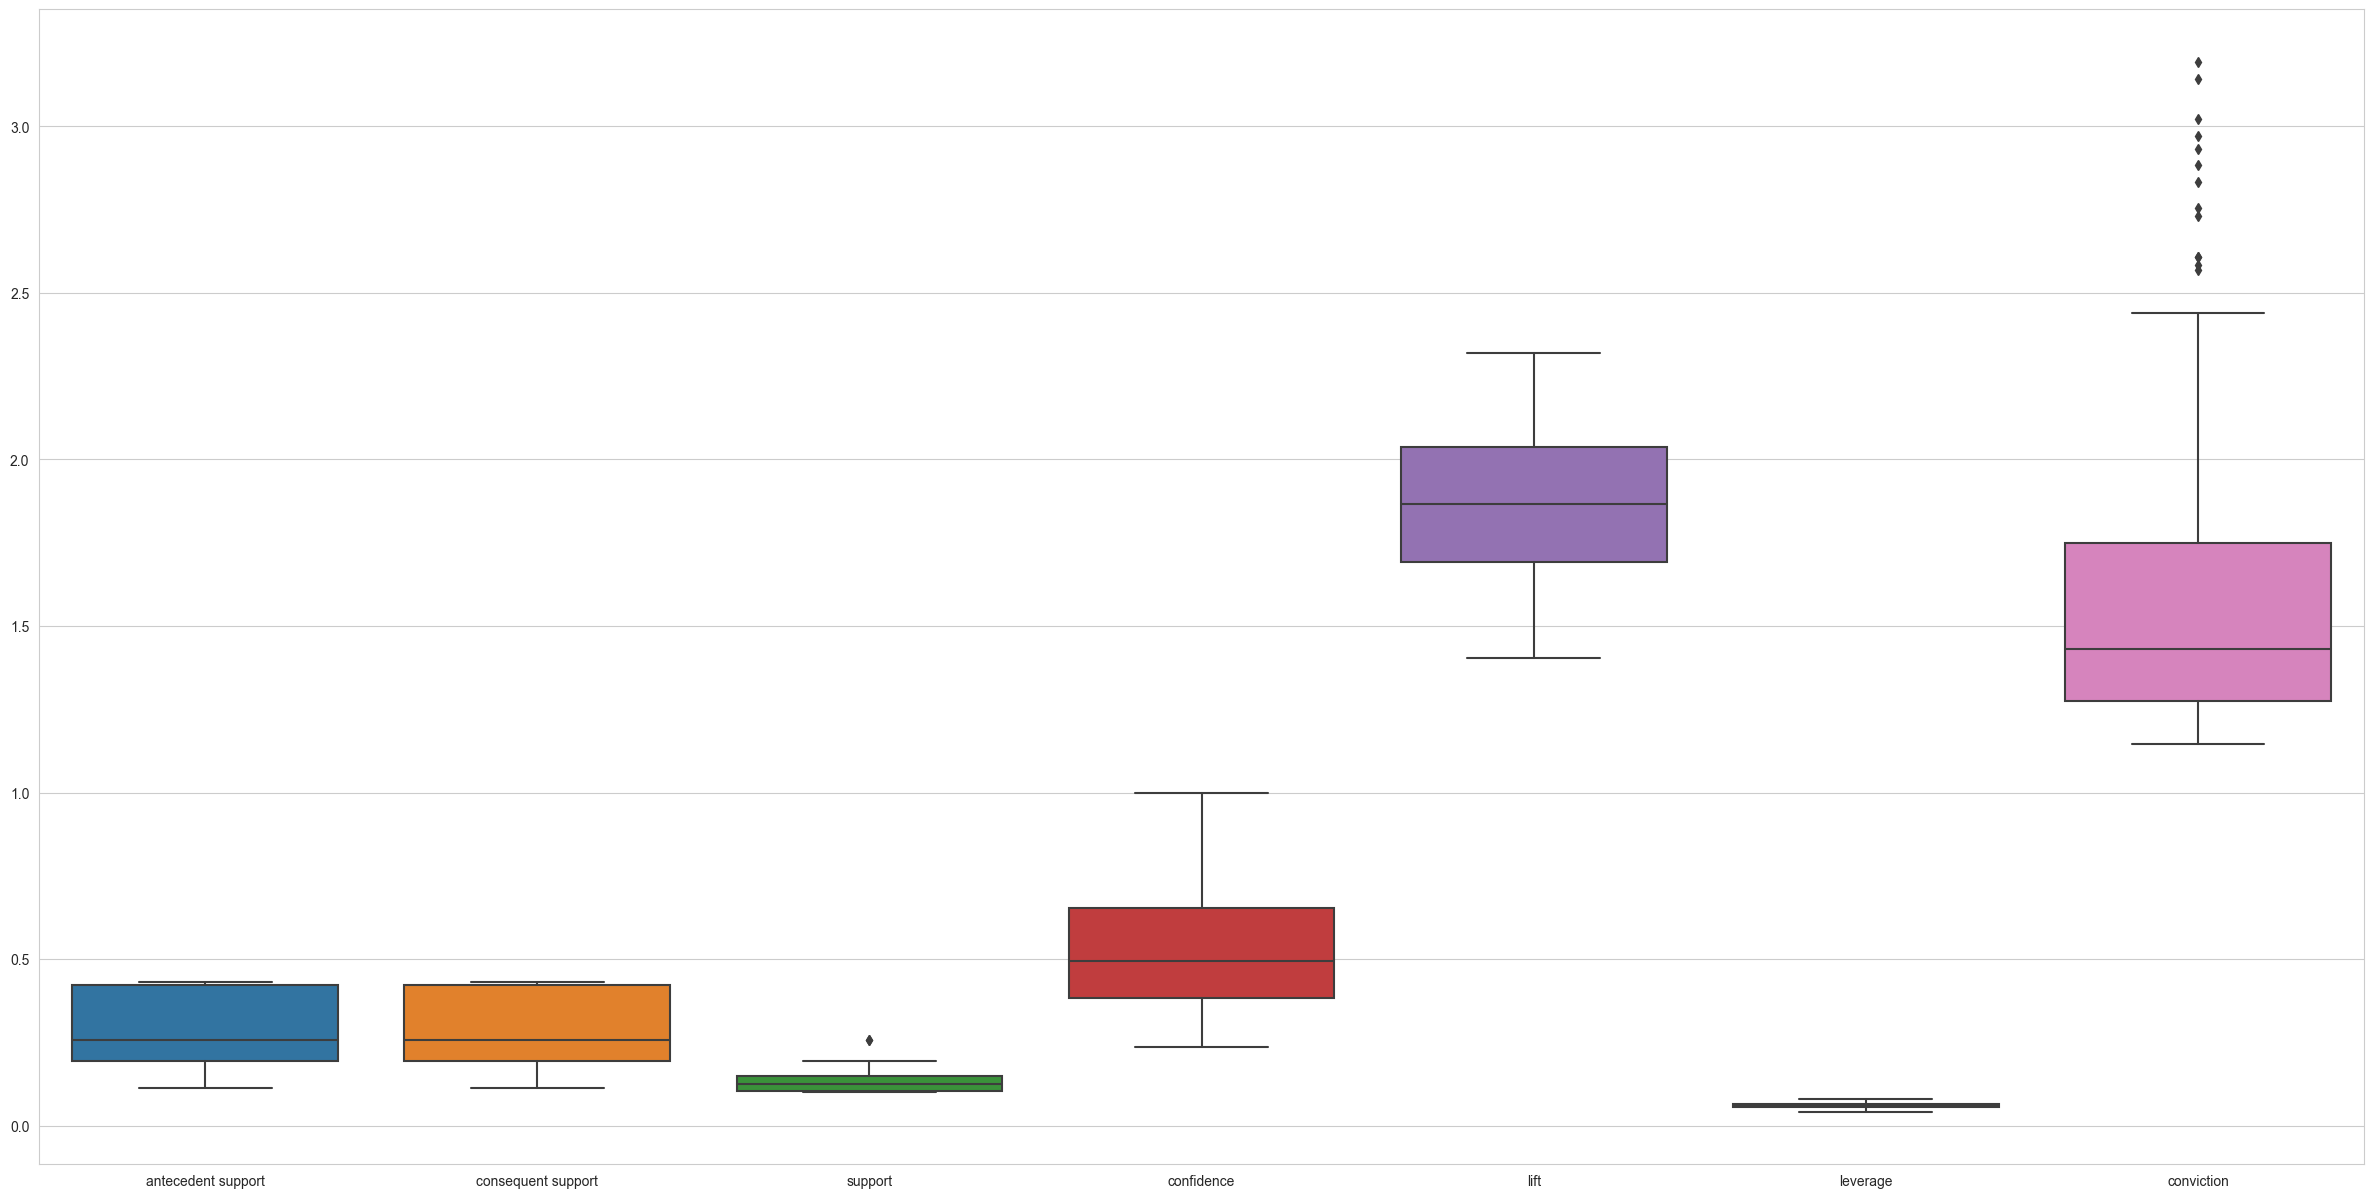

In [11]:
plt.figure(figsize=(30,15))
fig1 = sns.boxplot(rules)
plt.show()

### Association rules with 5% Support and 80% confidence

In [12]:
book1 = apriori(books, min_support=0.05, use_colnames=True)
book1

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
95,0.0600,"(YouthBks, GeogBks, CookBks, DoItYBks)"
96,0.0560,"(ArtBks, YouthBks, GeogBks, CookBks)"
97,0.0650,"(ArtBks, GeogBks, CookBks, DoItYBks)"
98,0.0510,"(ChildBks, CookBks, YouthBks, DoItYBks, GeogBks)"


In [13]:
rules1 = association_rules(book1, metric="lift", min_threshold=0.8)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
...,...,...,...,...,...,...,...,...,...
657,(ChildBks),"(ArtBks, GeogBks, CookBks, DoItYBks)",0.4230,0.0650,0.0535,0.126478,1.945808,0.026005,1.070379
658,(CookBks),"(ArtBks, GeogBks, ChildBks, DoItYBks)",0.4310,0.0595,0.0535,0.124130,2.086217,0.027856,1.073789
659,(ArtBks),"(GeogBks, ChildBks, CookBks, DoItYBks)",0.2410,0.0890,0.0535,0.221992,2.494289,0.032051,1.170939
660,(DoItYBks),"(ArtBks, GeogBks, ChildBks, CookBks)",0.2820,0.0835,0.0535,0.189716,2.272052,0.029953,1.131085


### An leverage value of 0 indicates independence. Range will be [-1 1]
### A high conviction value means that the consequent is highly depending on the antecedent and range [0 inf]

In [14]:
rules1.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
182,"(YouthBks, CookBks)",(ItalCook),0.1620,0.1135,0.0590,0.364198,3.208789,0.040613,1.394301
183,(ItalCook),"(YouthBks, CookBks)",0.1135,0.1620,0.0590,0.519824,3.208789,0.040613,1.745193
512,"(GeogBks, CookBks)","(ItalCook, ChildBks)",0.1925,0.0850,0.0525,0.272727,3.208556,0.036137,1.258125
509,"(ItalCook, ChildBks)","(GeogBks, CookBks)",0.0850,0.1925,0.0525,0.617647,3.208556,0.036137,2.111923
513,"(ChildBks, CookBks)","(ItalCook, GeogBks)",0.2560,0.0640,0.0525,0.205078,3.204346,0.036116,1.177474
508,"(ItalCook, GeogBks)","(ChildBks, CookBks)",0.0640,0.2560,0.0525,0.820312,3.204346,0.036116,4.140522
637,"(ArtBks, ChildBks, CookBks)","(GeogBks, DoItYBks)",0.1265,0.1325,0.0535,0.422925,3.191886,0.036739,1.503271
656,"(GeogBks, DoItYBks)","(ArtBks, ChildBks, CookBks)",0.1325,0.1265,0.0535,0.403774,3.191886,0.036739,1.465047
514,(ItalCook),"(GeogBks, ChildBks, CookBks)",0.1135,0.1495,0.0525,0.462555,3.094014,0.035532,1.582488
507,"(GeogBks, ChildBks, CookBks)",(ItalCook),0.1495,0.1135,0.0525,0.351171,3.094014,0.035532,1.366307


In [15]:
rules1[rules1.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
...,...,...,...,...,...,...,...,...,...
657,(ChildBks),"(ArtBks, GeogBks, CookBks, DoItYBks)",0.4230,0.0650,0.0535,0.126478,1.945808,0.026005,1.070379
658,(CookBks),"(ArtBks, GeogBks, ChildBks, DoItYBks)",0.4310,0.0595,0.0535,0.124130,2.086217,0.027856,1.073789
659,(ArtBks),"(GeogBks, ChildBks, CookBks, DoItYBks)",0.2410,0.0890,0.0535,0.221992,2.494289,0.032051,1.170939
660,(DoItYBks),"(ArtBks, GeogBks, ChildBks, CookBks)",0.2820,0.0835,0.0535,0.189716,2.272052,0.029953,1.131085


### Data Visualization

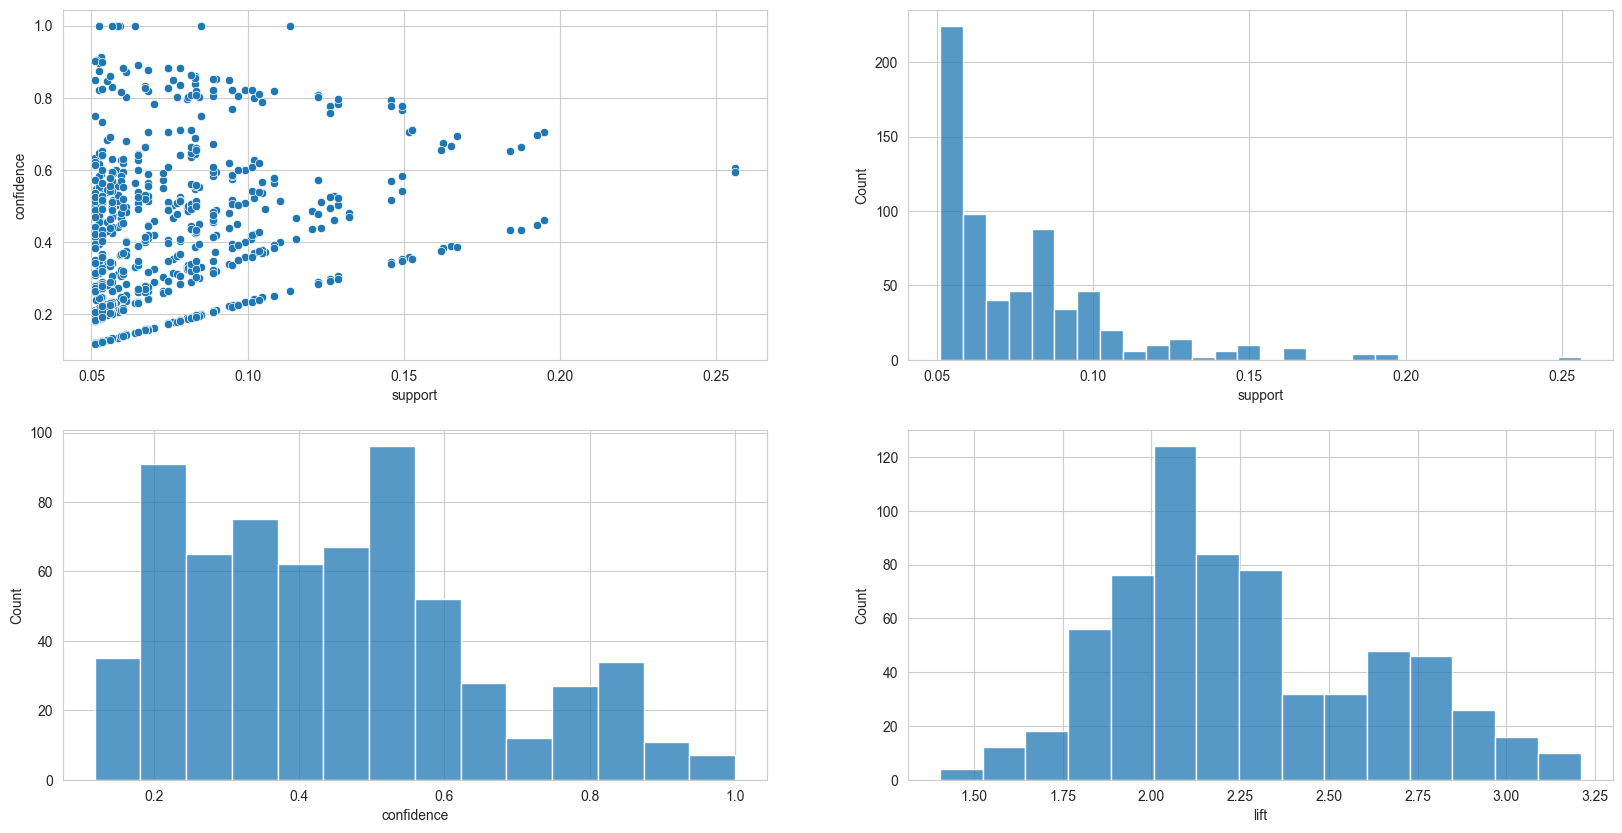

In [16]:
fig,axes = plt.subplots(2,2,figsize=(20,10))
fig1 = sns.scatterplot(data = rules1,x='support',y='confidence',ax=axes[0,0])
fig2 = sns.histplot(data = rules1,x='support',ax=axes[0,1])
fig3 = sns.histplot(data = rules1,x='confidence',ax=axes[1,0])
fig4 = sns.histplot(data = rules1,x='lift',ax=axes[1,1])
plt.show()

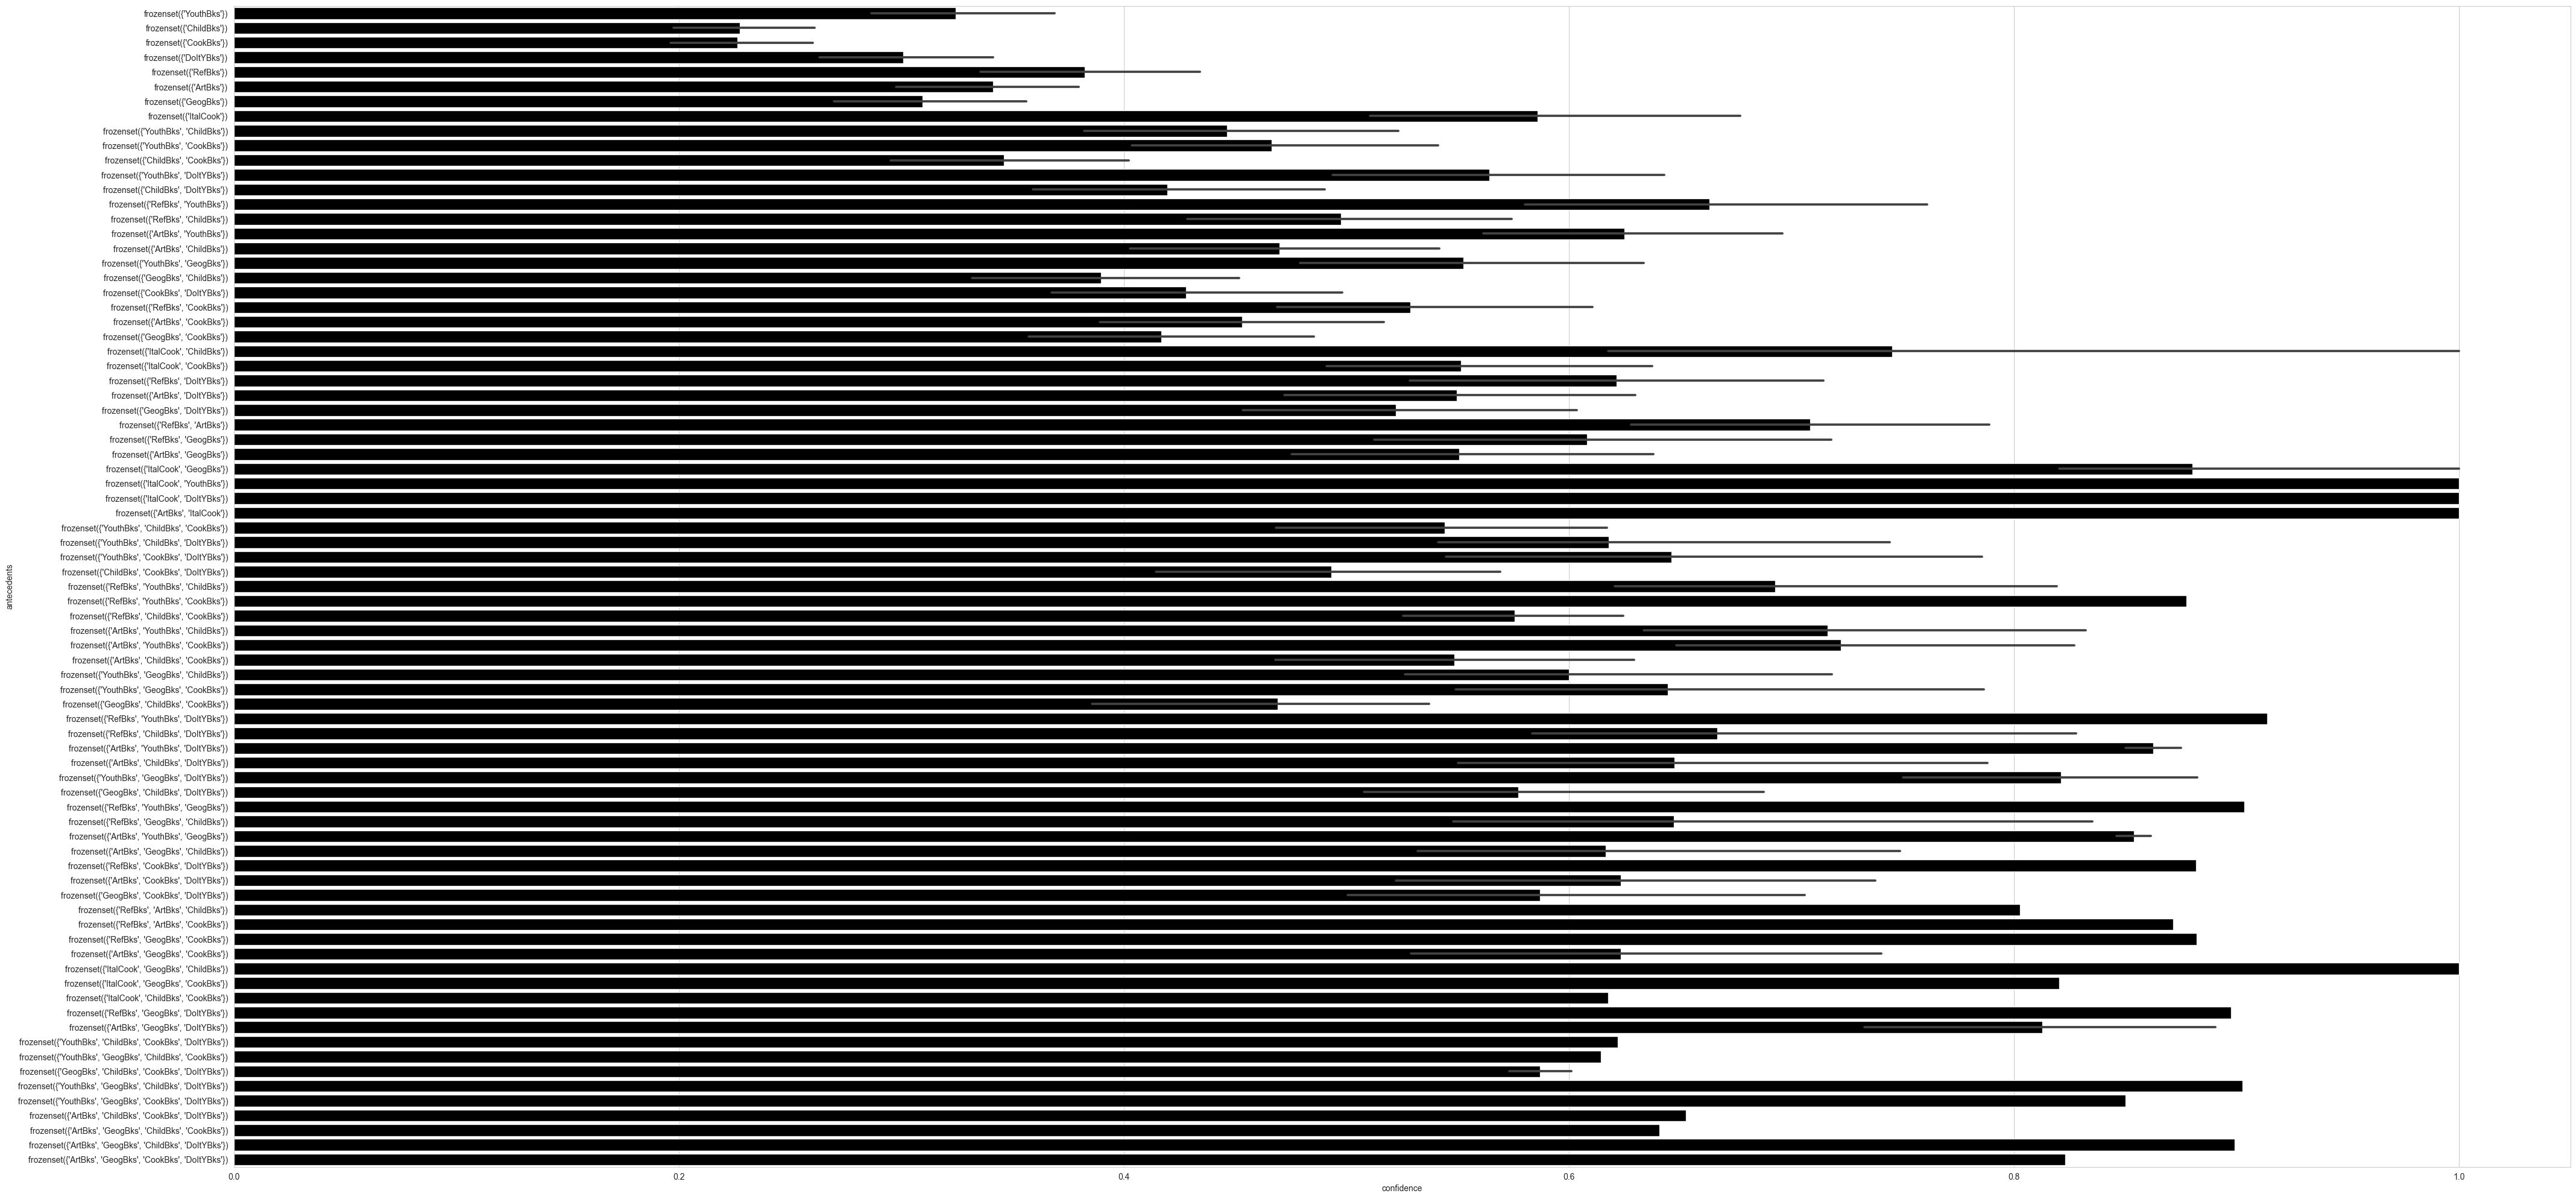

In [17]:
plt.figure(figsize=(50,25))
fig1 = sns.barplot(data = rules1,x = 'confidence',y = 'antecedents',color='black')
plt.show()

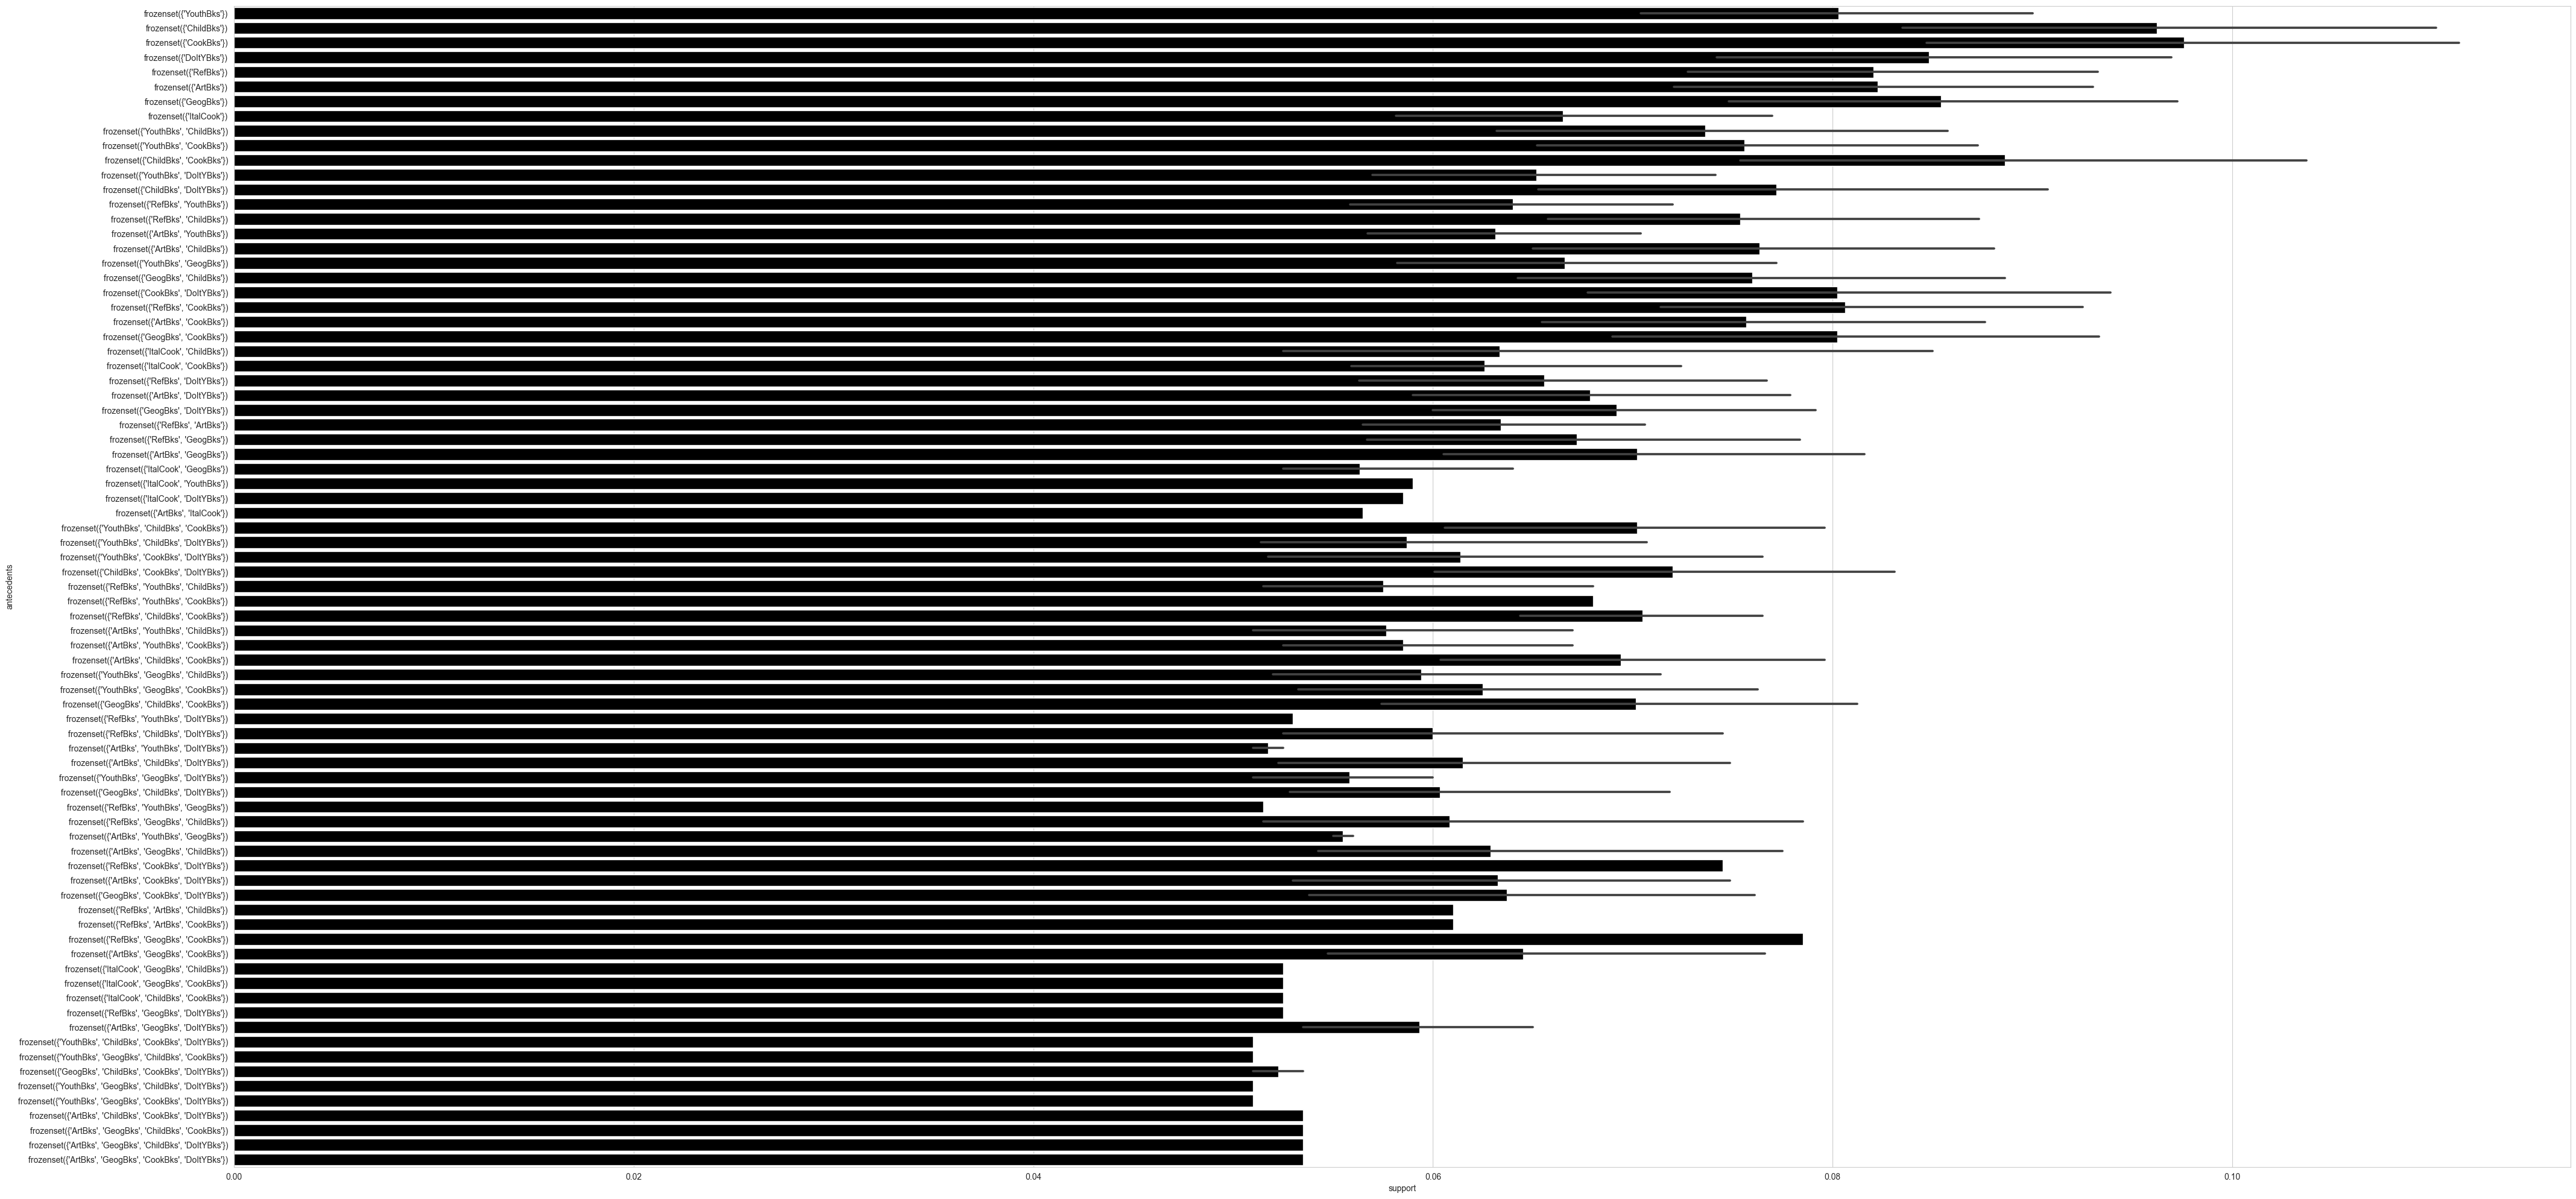

In [18]:
plt.figure(figsize=(50,25))
fig1 = sns.barplot(data = rules1,x = 'support',y = 'antecedents',color='black')
plt.show()

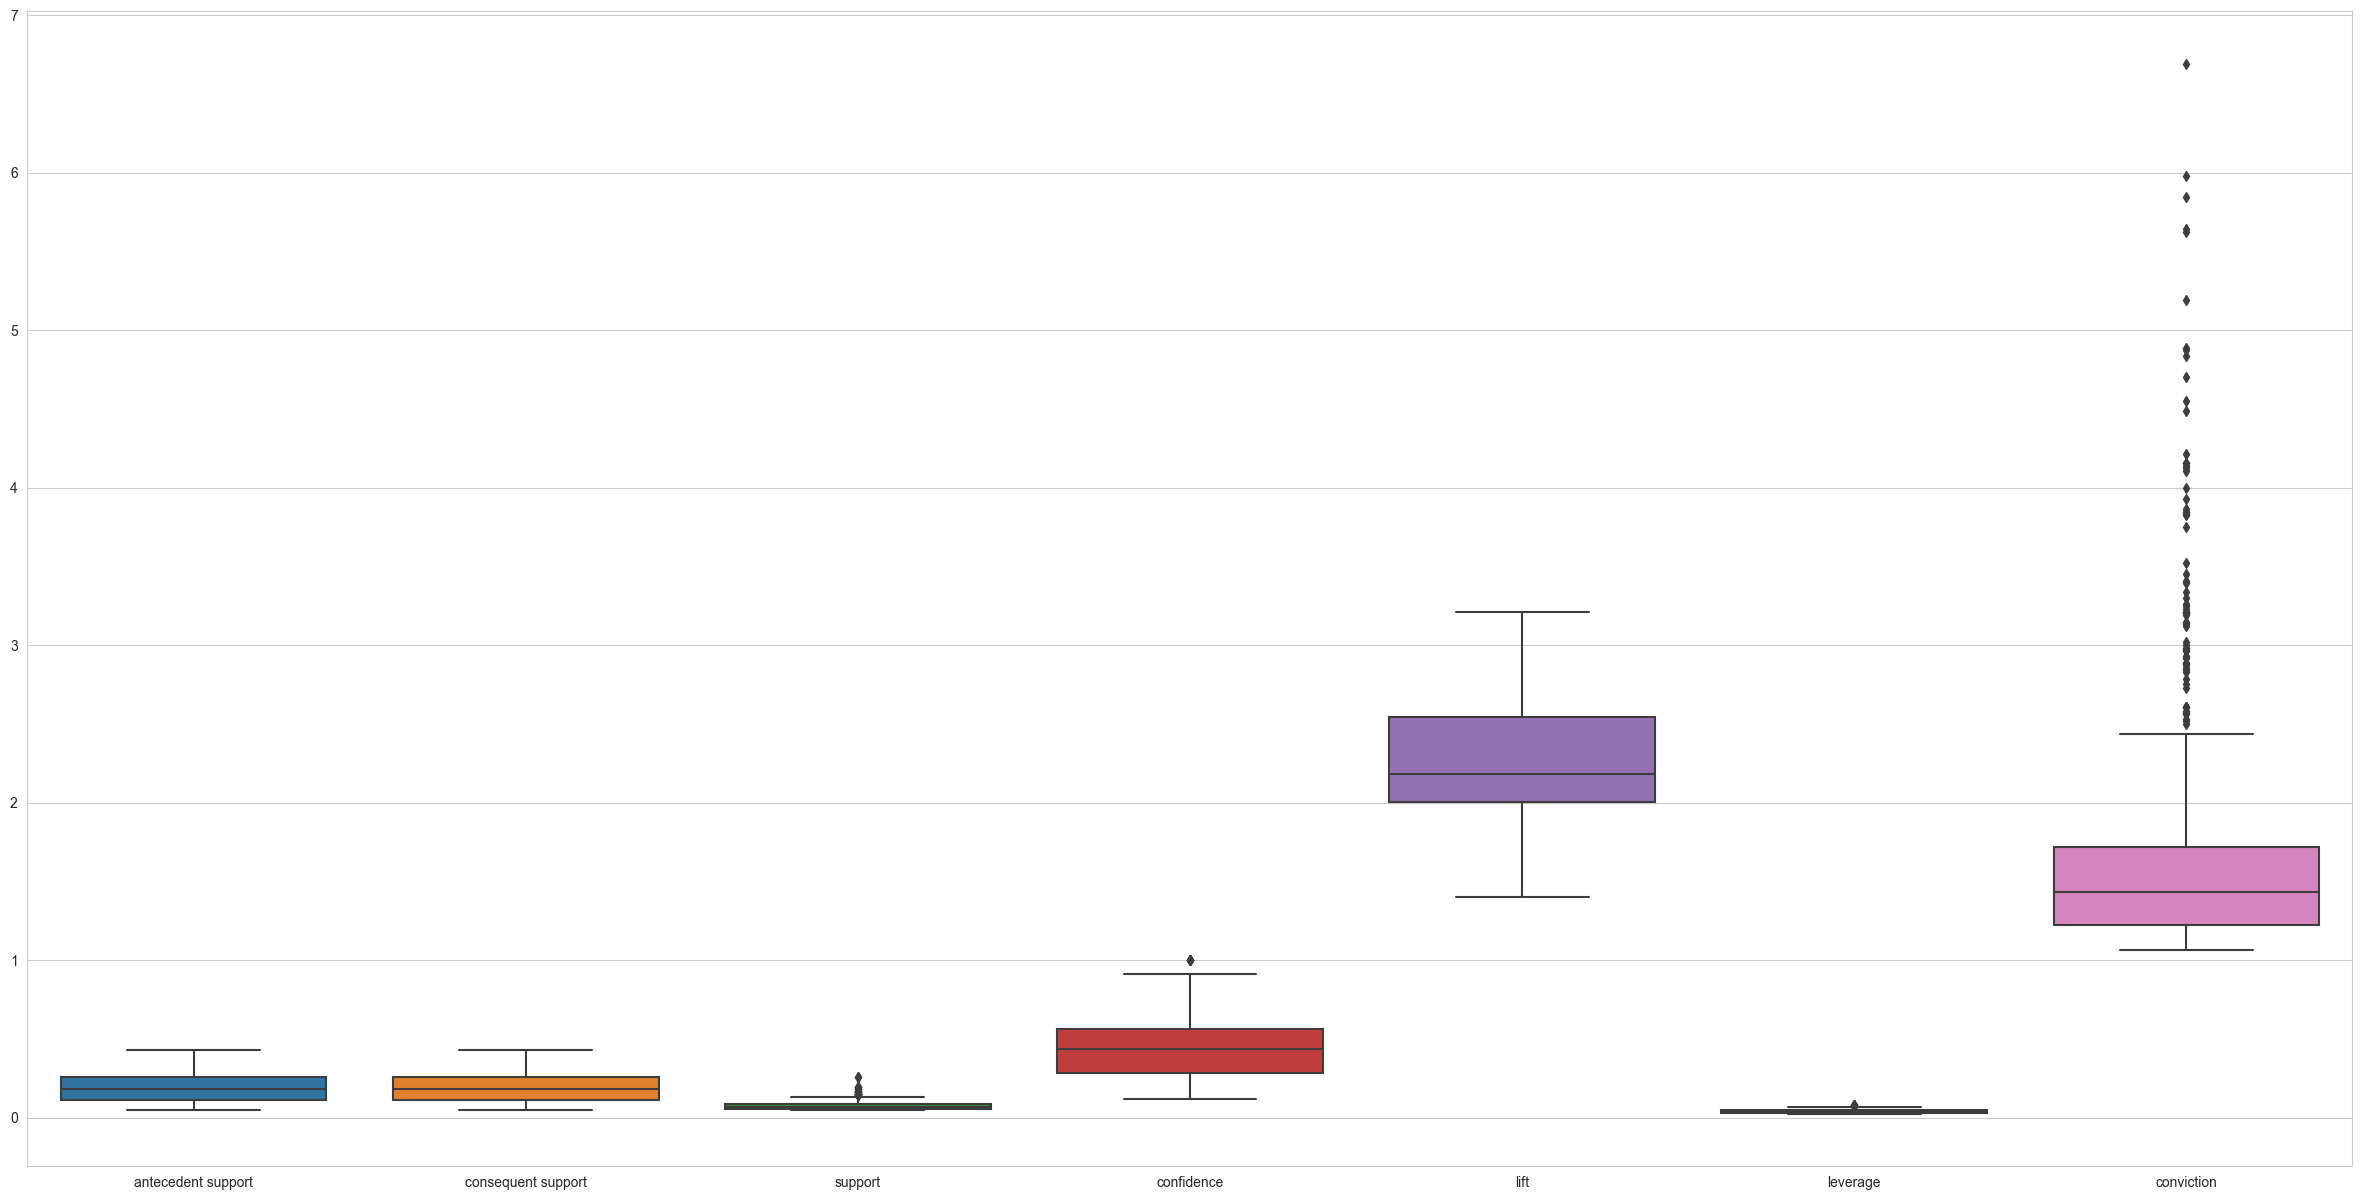

In [19]:
plt.figure(figsize=(30,15))
fig1 = sns.boxplot(rules1)
plt.show()

# Movie csv

In [20]:
movie = pd.read_csv('my_movies.csv')

In [21]:
movie.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [22]:
movie.tail()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [23]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [24]:
# Get list of categorical variables
s = (movie.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['V1', 'V2', 'V3', 'V4', 'V5']


In [25]:
num_movie = movie.iloc[:,5:15]
num_movie.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0


# Apriori Algorithm

In [26]:
frequent_itemsets_ap = apriori(num_movie, min_support=0.15, use_colnames=True,verbose=1)
print(frequent_itemsets_ap.head())

Processing 27 combinations | Sampling itemset size 3
   support         itemsets
0      0.6    (Sixth Sense)
1      0.7      (Gladiator)
2      0.2          (LOTR1)
3      0.2  (Harry Potter1)
4      0.6        (Patriot)


In [27]:
frequent_itemsets_ap.sort_values("support", ascending = False).shape

(13, 2)

In [28]:
rules_ap = association_rules(frequent_itemsets_ap, metric="confidence", min_threshold=0.1)
print(rules_ap.head())

     antecedents    consequents  antecedent support  consequent support  \
0    (Gladiator)  (Sixth Sense)                 0.7                 0.6   
1  (Sixth Sense)    (Gladiator)                 0.6                 0.7   
2      (Patriot)  (Sixth Sense)                 0.6                 0.6   
3  (Sixth Sense)      (Patriot)                 0.6                 0.6   
4   (Green Mile)  (Sixth Sense)                 0.2                 0.6   

   support  confidence      lift  leverage  conviction  
0      0.5    0.714286  1.190476      0.08         1.4  
1      0.5    0.833333  1.190476      0.08         1.8  
2      0.4    0.666667  1.111111      0.04         1.2  
3      0.4    0.666667  1.111111      0.04         1.2  
4      0.2    1.000000  1.666667      0.08         inf  


In [29]:
rules_ap[(rules_ap.support > 0.015) & (rules_ap.confidence > 0.4)].sort_values("confidence", ascending = False).shape

(15, 9)

In [30]:
rules_ap['lhs items'] = rules_ap['antecedents'].apply(lambda x:len(x) )
rules_ap[rules_ap['lhs items']>1].sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items
11,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,2
12,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,2
10,"(Patriot, Gladiator)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,2


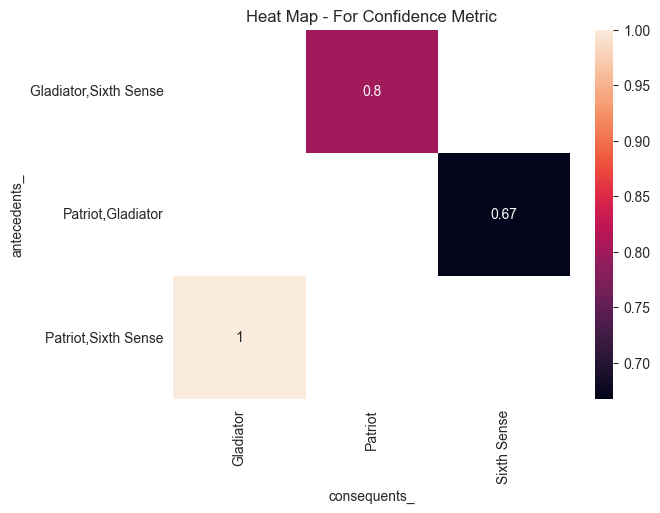

In [31]:
rules_ap['antecedents_'] = rules_ap['antecedents'].apply(lambda a: ','.join(list(a)))
rules_ap['consequents_'] = rules_ap['consequents'].apply(lambda a: ','.join(list(a)))
# Transform the DataFrame of rules into a matrix using the confidence metric
pivot = rules_ap[rules_ap['lhs items']>1].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'confidence')
# Generate a heatmap with annotations 
sns.heatmap(pivot, annot = True)
plt.title('Heat Map - For Confidence Metric')
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

In [32]:
rules_ap_li = association_rules(frequent_itemsets_ap, metric="lift", min_threshold=0.8)
print(rules_ap_li.shape)

(16, 9)


In [33]:
rules_ap_li['lhs items'] = rules_ap_li['antecedents'].apply(lambda x:len(x) )
rules_ap_li[rules_ap_li['lhs items']>1].sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items
11,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,2
12,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,2
10,"(Patriot, Gladiator)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,2


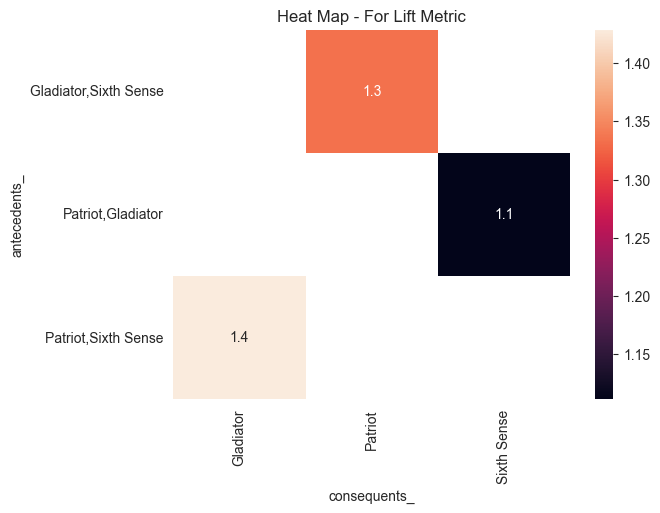

In [34]:
# Replace frozen sets with strings
rules_ap_li['antecedents_'] = rules_ap_li['antecedents'].apply(lambda a: ','.join(list(a)))
rules_ap_li['consequents_'] = rules_ap_li['consequents'].apply(lambda a: ','.join(list(a)))
# Transform the DataFrame of rules into a matrix using the lift metric
pivot = rules_ap_li[rules_ap_li['lhs items']>1].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'lift')
# Generate a heatmap with annotations on and the colorbar off
sns.heatmap(pivot, annot = True)
plt.title('Heat Map - For Lift Metric')
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

# FpGrowth Algorithm

In [35]:
frequent_itemsets_fp=fpgrowth(num_movie, min_support=0.1, use_colnames=True,verbose=1)
print(frequent_itemsets_fp.shape)

10 itemset(s) from tree conditioned on items ()
3 itemset(s) from tree conditioned on items (Sixth Sense)
3 itemset(s) from tree conditioned on items (Green Mile)
3 itemset(s) from tree conditioned on items (LOTR2)
7 itemset(s) from tree conditioned on items (Harry Potter1)
15 itemset(s) from tree conditioned on items (LOTR1)
0 itemset(s) from tree conditioned on items (Gladiator)
1 itemset(s) from tree conditioned on items (Patriot)
3 itemset(s) from tree conditioned on items (Braveheart)
1 itemset(s) from tree conditioned on items (Harry Potter2)
7 itemset(s) from tree conditioned on items (LOTR)
(53, 2)


In [36]:
frequent_itemsets_fp.sort_values("support", ascending = False).head()

,support,itemsets
5,0.7,(Gladiator)
0,0.6,(Sixth Sense)
41,0.6,"(Patriot, Gladiator)"
6,0.6,(Patriot)
10,0.5,"(Gladiator, Sixth Sense)"


In [37]:
rules_fp = association_rules(frequent_itemsets_fp, metric="confidence", min_threshold=0.8)
print(rules_fp.head())

                antecedents    consequents  antecedent support  \
0             (Sixth Sense)    (Gladiator)                 0.6   
1    (Patriot, Sixth Sense)    (Gladiator)                 0.4   
2  (Gladiator, Sixth Sense)      (Patriot)                 0.5   
3              (Green Mile)  (Sixth Sense)                 0.2   
4   (Green Mile, Gladiator)  (Sixth Sense)                 0.1   

   consequent support  support  confidence      lift  leverage  conviction  
0                 0.7      0.5    0.833333  1.190476      0.08         1.8  
1                 0.7      0.4    1.000000  1.428571      0.12         inf  
2                 0.6      0.4    0.800000  1.333333      0.10         2.0  
3                 0.6      0.2    1.000000  1.666667      0.08         inf  
4                 0.6      0.1    1.000000  1.666667      0.04         inf  


In [38]:
rules_fp[(rules_fp.support > 0.1) & (rules_fp.confidence > 0.4)].sort_values("confidence",
                                ascending = False).shape

(8, 9)

In [39]:
rules_fp['lhs items'] = rules_fp['antecedents'].apply(lambda x:len(x) )
rules_fp[rules_fp['lhs items']>1].sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items
126,"(Sixth Sense, LOTR)","(Green Mile, Gladiator)",0.1,0.1,0.1,1.0,10.0,0.09,inf,2
87,"(Harry Potter1, LOTR2, Sixth Sense)","(Green Mile, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf,3
83,"(Green Mile, LOTR1, Harry Potter1)","(LOTR2, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf,3
81,"(Green Mile, LOTR1, LOTR2)","(Harry Potter1, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf,3
80,"(Green Mile, LOTR2, Harry Potter1)","(LOTR1, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf,3


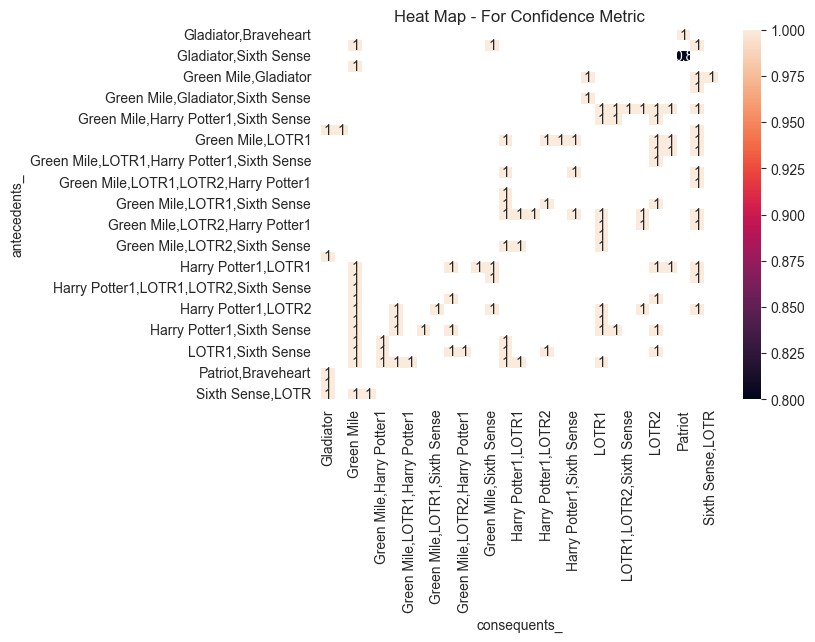

In [40]:
rules_fp['antecedents_'] = rules_fp['antecedents'].apply(lambda a: ','.join(list(a)))
rules_fp['consequents_'] = rules_fp['consequents'].apply(lambda a: ','.join(list(a)))

# Transform the DataFrame of rules into a matrix using the confidence metric

pivot = rules_fp[rules_fp['lhs items']>1].pivot(index = 'antecedents_',columns = 'consequents_', values= 'confidence')

# Generate a heatmap with annotations 
sns.heatmap(pivot, annot = True)
plt.title('Heat Map - For Confidence Metric')
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

In [41]:
rules_fp_li = association_rules(frequent_itemsets_fp, metric="lift", min_threshold=0.8)
print(rules_fp_li.shape)

(246, 9)


In [42]:
rules_fp_li['lhs items'] = rules_fp_li['antecedents'].apply(lambda x:len(x) )
rules_fp_li[rules_fp_li['lhs items']>1].sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items
241,"(Sixth Sense, LOTR)","(Green Mile, Gladiator)",0.1,0.1,0.1,1.0,10.0,0.09,inf,2
177,"(LOTR1, LOTR2, Sixth Sense)","(Green Mile, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf,3
59,"(Harry Potter1, Sixth Sense)","(Green Mile, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf,2
176,"(Harry Potter1, LOTR2, Sixth Sense)","(Green Mile, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf,3
174,"(Green Mile, LOTR1, Sixth Sense)","(Harry Potter1, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf,3


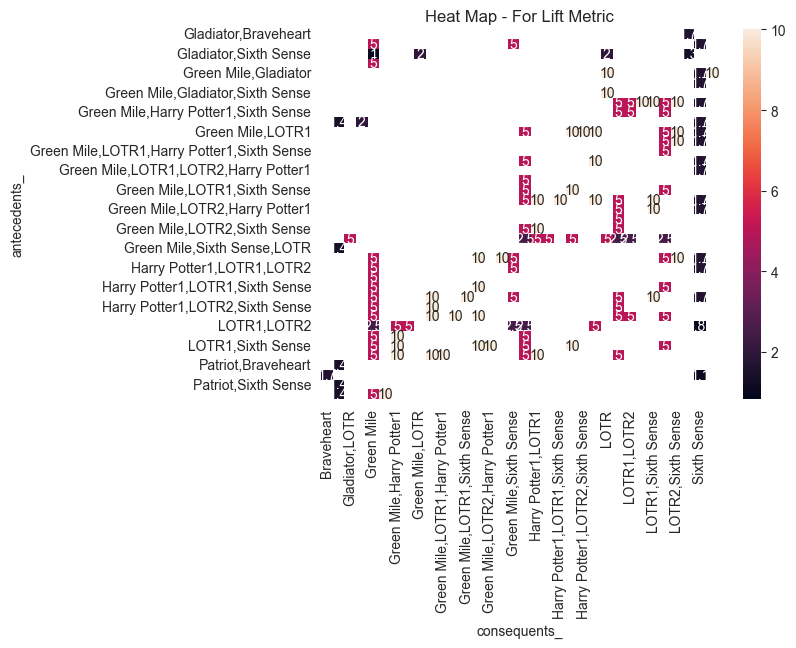

In [43]:
# Replace frozen sets with strings
rules_fp_li['antecedents_'] = rules_fp_li['antecedents'].apply(lambda a: ','.join(list(a)))
rules_fp_li['consequents_'] = rules_fp_li['consequents'].apply(lambda a: ','.join(list(a)))
# Transform the DataFrame of rules into a matrix using the lift metric
pivot = rules_fp_li[rules_fp_li['lhs items']>1].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'lift')
# Generate a heatmap with annotations on and the colorbar off
sns.heatmap(pivot, annot = True)
plt.title('Heat Map - For Lift Metric')
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()